# Proyek Sistem Rekomendasi - Norman Dwi Febrio

## Data Understanding

![Model Metrics](Model_metrics.jpg)


Dataset yang digunakan didownload dari Kaggle dengan judul dataset "Book Recommendation Dataset". Dataset ini terdiri dari 3 file csv, yaitu 'Books.csv', 'Ratings.csv', dan 'Users.csv'.


Users
- Berisi informasi mengenai ID, lokasi, dan usia pengguna.

Books
- Berisi informasi mengenai ISBN, judul buku, penulis buku, tahun terbit, penerbit, dan link gambar buku. Buku diidentifikasi dengan ISBN masing-masing. ISBN yang tidak valid telah dihapus dari kumpulan data. 

Ratings
- Berisi informasi mengenai ID pengguna, ISBN, dan rating oleh pengguna. Rating yang disediakan berupa rating secara eksplisit (skala 1 - 10) dan rating secara implisit (0).

### Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.callbacks import LearningRateScheduler, EarlyStopping

C:\Users\Norman Dwi Febrio\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Transform dataset yang digunakan menjadi pandas dataframe
books = pd.read_csv("Books.csv", low_memory=False)
ratings = pd.read_csv("Ratings.csv", low_memory=False)
users = pd.read_csv("Users.csv", low_memory=False)

# Tampilkan 5 baris pertama
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Univariate Analysis

#### Books

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Dari informasi di atas, diketahui bahwa:
1. Dataset ini memiliki entri data sebanyak 271360.
2. Variabel "Year-Of-Publication" bertipe data object, seharusnya adalah int64.
3. Terdapat 8 variabel.
4. Terdapat nilai null pada variabel "Book-Author", "Publisher", dan "Image-URL-L".

In [6]:
print(f"Terdapat {books['Book-Author'].nunique()} penulis")
print(f"Terdapat {books['Publisher'].nunique()} penerbit buku")

Terdapat 102023 penulis
Terdapat 16807 penerbit buku


In [7]:
books['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

Berdasarkan penjelasan dari pemilik dataset, dataset ini dibuat di tahun 2004. Oleh karena itu, semua data buku yang tahun terbitnya lebih dari 2004 ataupun 0 akan diubah menjadi nilai rata-rata dari tahun terbit seluruh buku. 

Kemudian, terdapat 'DK Publishing Inc' dan 'Gallimard' pada variabel tahun. Apa yang menyebabkan ini?

In [8]:
books[(books["Year-Of-Publication"]=="Gallimard") | (books["Year-Of-Publication"]=="DK Publishing Inc")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Ternyata, terdapat kesalahan input yaitu data yang seharusnya merupakan penulis buku menjadi terinput dalam variabel tahun terbit. Begitupun sebaliknya.

#### Ratings

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Dataset ini tidak memiliki nilai null dan tipe data yang dimiliki tiap variabel sudah tepat semua.

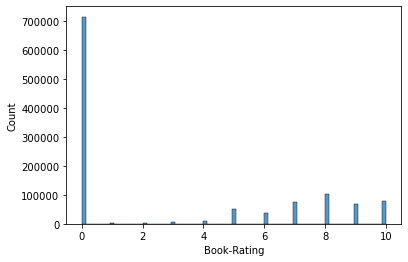

In [10]:
sns.histplot(ratings["Book-Rating"])
plt.savefig("Rating Distribution.jpg")
plt.show()

Berdasarkan penjelasan dari pemilik dataset, rating ini terdiri dari rating eksplisit dan implisit. Rating eksplisit adalah rating dengan nilai 1 - 10. Rating implisit adalah rating dengan nilai 0.

#### Users

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Terdapat nilai null pada variabel "Age" dan tipe datanya adalah float64, seharusnya adalah int64.

## Data Preparation

Berdasarkan eksplorasi yang dilakukan di atas, maka akan dilakukan tahapan-tahapan pada dataframe ini.

#### Books

Pada dataset ini, variabel yang akan digunakan untuk sistem rekomendasi adalah ISBN, judul buku, penulis buku, dan penerbit buku. Oleh karena itu, kita akan menghapus variabel yang tidak digunakan.

In [12]:
new_books = books.drop(["Image-URL-S", "Image-URL-M", "Image-URL-L"], axis=1)
new_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


##### Menghapus nilai null pada variabel Book-Author

In [13]:
new_books.dropna(how="any", axis=0, inplace=True)
new_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

##### Memperbaiki kesalahan input data

Terdapat 3 buku yang salah dalam input data. Adapun ISBN dari ketiga buku tersebut adalah 078946697X, 2070426769, 0789466953.

- Pada ISBN 078946697X, tahun terbitnya adalah 2000 dan penulisnya adalah DK Publishing Inc.
- Pada ISBN 2070426769, tahun terbitnya adalah 2003 dan penulisnya adalah Gallimard.
- Pada ISBN 0789466953, tahun terbitnya adalah 2000 dan penulisnya adalah DK Publishing Inc.

In [14]:
# Memperbaiki data pada buku dengan ISBN 078946697X
new_books.loc[new_books["ISBN"]=="078946697X", "Book-Author"] = "DK Publishing Inc"
new_books.loc[new_books["ISBN"]=="078946697X", "Year-Of-Publication"] = "2000"

# Memperbaiki data pada buku dengan ISBN 2070426769
new_books.loc[new_books["ISBN"]=="2070426769", "Book-Author"] = "Gallimard"
new_books.loc[new_books["ISBN"]=="2070426769", "Year-Of-Publication"] = "2003"

# Memperbaiki data pada buku dengan ISBN 0789466953
new_books.loc[new_books["ISBN"]=="0789466953", "Book-Author"] = "DK Publishing Inc"
new_books.loc[new_books["ISBN"]=="0789466953", "Year-Of-Publication"] = "2000"

Setelah itu, kita periksa apakah datanya sudah benar.

In [15]:
new_books[(new_books["ISBN"]=="078946697X") | (new_books["ISBN"]=="2070426769") | (new_books["ISBN"]=="0789466953")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",DK Publishing Inc,2000,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",Gallimard,2003,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",DK Publishing Inc,2000,http://images.amazon.com/images/P/0789466953.0...


Ketiga data tersebut sudah berhasil diperbaiki.

##### Mengubah tipe data tahun terbit

In [16]:
new_books["Year-Of-Publication"] = new_books["Year-Of-Publication"].astype("int64")
new_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271357 non-null  object
 3   Year-Of-Publication  271357 non-null  int64 
 4   Publisher            271357 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB


##### Menyesuaikan tahun terbit buku

Seperti yang sudah dijelaskan di atas, dataset ini dibuat pada tahun 2004. Jadi, buku yang tahun terbitnya lebih dari 2004 atau buku yang tahun terbitnya 0 akan diubah dengan rata-rata tahun terbit buku semua buku yang ada.

In [17]:
avg_year = int(new_books["Year-Of-Publication"].mean())

new_books["Year-Of-Publication"] = new_books["Year-Of-Publication"].apply(lambda x: avg_year if ((x == 0) | (x > 2004)) else x )

In [18]:
new_books["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1959, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948, 1943,
       1947, 1945, 1923, 1939, 1926, 1938, 1911, 1904, 1949, 1932, 1928,
       1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902, 1924, 1921, 1900,
       1944, 1917, 1901, 1908, 1906, 1935, 1806, 1909, 1378, 1919, 1922,
       1897, 1376], dtype=int64)

In [19]:
print(f"Tahun terbit paling awal pada dataset ini adalah pada tahun {(min(new_books['Year-Of-Publication']))} dan tahun terbit paling akhir pada dataset ini adalah pada tahun {str(max(new_books['Year-Of-Publication']))}")

Tahun terbit paling awal pada dataset ini adalah pada tahun 1376 dan tahun terbit paling akhir pada dataset ini adalah pada tahun 2004


Tahapan-tahapan yang diperlukan untuk dataset ini sudah selesai dilakukan. Selanjutnya, karena dataset ini memiliki entri data yang cukup banyak, hal ini tentu akan memakan cukup banyak waktu dan bahkan bisa menyebabkan "Out of memory" ketika kita membuat sistem rekomendasi. Oleh karena itu, kita akan membatasi dataset yang digunakan. Data yang akan digunakan adalah ditentukan berdasarkan banyaknya penulis menulis buku. Di sini, kita batasi hanya penulis yang menulis lebih dari 100 buku.

In [20]:
cnt_of_books_by_author = new_books.groupby("Book-Author")["Book-Title"].count().reset_index()
cnt_of_books_by_author = cnt_of_books_by_author.rename(columns={"Book-Title":"Book-Count"})
cnt_of_books_by_author = cnt_of_books_by_author.sort_values(by="Book-Count", ascending=False)
top_author_by_num_of_books = cnt_of_books_by_author[cnt_of_books_by_author["Book-Count"]>100]
top_author_by_num_of_books

,Book-Author,Book-Count
1086,Agatha Christie,632
100923,William Shakespeare,567
91188,Stephen King,524
4565,Ann M. Martin,423
13495,Carolyn Keene,373
...,...,...
13724,Cassie Edwards,103
97410,V.C. Andrews,102
57249,Larry McMurtry,101
40016,Isabel Allende,101


Output di atas menunjukkan nama nama penulis yang menulis lebih dari 100 buku. Para penulis inilah yang akan digunakan sebagai data pada sistem rekomendasi.

In [21]:
print("Count of authors who wrote more than 100 books: ", top_author_by_num_of_books.shape[0])
book_author = top_author_by_num_of_books['Book-Author'].to_list()

Count of authors who wrote more than 100 books:  100


In [22]:
books_of_top_100_author = new_books[new_books["Book-Author"].isin(book_author)]
books_of_top_100_author = books_of_top_100_author[["ISBN","Book-Title","Book-Author"]]
books_of_top_100_author = books_of_top_100_author.drop_duplicates(subset="Book-Title")
books_of_top_100_author

,ISBN,Book-Title,Book-Author
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield
18,0440234743,The Testament,John Grisham
41,055321215X,Pride and Prejudice,Jane Austen
44,0553582909,Icebound,Dean R. Koontz
45,0671888587,I'll Be Seeing You,Mary Higgins Clark
...,...,...,...
271195,0816772088,K-Niner : Dog of Doom (Garfield's Pet Force Bo...,Jim Davis
271250,073943828X,Murder at the Manor (Mystery Guild Lost Classi...,Agatha Christie
271258,0684857502,TEXASVILLE : A Novel,Larry McMurtry
271319,3404204433,Am Ende des Regenbogens.,Alan Dean Foster


##### Mengubah Spasi pada Author Menjadi Underscore (\_)

Tahapan ini perlu dilakukan untuk menghindari adanya pemisahan nama yang disebabkan oleh spasi pada metode TF-IDF nantinya.

In [23]:
books_of_top_100_author["Book-Author"] = books_of_top_100_author["Book-Author"].apply(lambda x: x.replace(" ", "_"))
books_of_top_100_author

,ISBN,Book-Title,Book-Author
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack_Canfield
18,0440234743,The Testament,John_Grisham
41,055321215X,Pride and Prejudice,Jane_Austen
44,0553582909,Icebound,Dean_R._Koontz
45,0671888587,I'll Be Seeing You,Mary_Higgins_Clark
...,...,...,...
271195,0816772088,K-Niner : Dog of Doom (Garfield's Pet Force Bo...,Jim_Davis
271250,073943828X,Murder at the Manor (Mystery Guild Lost Classi...,Agatha_Christie
271258,0684857502,TEXASVILLE : A Novel,Larry_McMurtry
271319,3404204433,Am Ende des Regenbogens.,Alan_Dean_Foster


Selanjutnya, kita akan menggabungkan dataframe di atas dengan dataframe "users" dan "ratings".

#### Menggabungkan DataFrame

In [24]:
book_rating = pd.merge(ratings, books_of_top_100_author[['Book-Title','ISBN']], on="ISBN", how="inner")
book_rating.drop("ISBN", axis=1, inplace=True)

In [25]:
book_rating

,User-ID,Book-Rating,Book-Title
0,276746,0,Lightning
1,277427,0,Lightning
2,1660,0,Lightning
3,2288,10,Lightning
4,4551,8,Lightning
...,...,...,...
109123,276538,6,Konig Richard Der Dritte
109124,276538,0,Ein Sommernachtstraum / A Midsummer Night's Dr...
109125,276538,7,Durch das Tor zum Himmlischen Frieden.
109126,276560,10,Ramona and Her Mother (Ramona Quimby (Hardcover))


## Modeling

### Content-based Filtering

Pada sistem rekomendasi conten-based filtering, data yang akan digunakan adalah buku buku dari 15 penulis buku terbanyak (books_of_top_15_author). Sebelum membuat sistem rekomendasinya, kita salin terlebih dahulu data books_of_top_15_author.

In [26]:
content_based_data = books_of_top_100_author.copy()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(token_pattern=r"(?u)\b\S+\b") # Memfilter token yang bukan merupakan whitespace

tfidf.fit(content_based_data["Book-Author"])

tfidf.get_feature_names_out()

array(['agatha_christie', 'alan_dean_foster', 'andre_norton',
       'ann_m._martin', 'anne_mccaffrey', 'anne_rice', 'author_unknown',
       'barbara_cartland', 'barbara_delinsky', 'beatrix_potter',
       'betty_neels', 'beverly_cleary', 'c._s._lewis', 'carolyn_keene',
       'cassie_edwards', 'catherine_coulter', 'charles_dickens',
       'christopher_pike', 'clive_cussler', 'danielle_steel',
       'dean_r._koontz', 'diana_palmer', 'dick_francis', 'don_pendleton',
       'ed_mcbain', 'edgar_allan_poe', 'edith_wharton', 'ellis_peters',
       'elmore_leonard', 'enid_blyton', 'ernest_hemingway',
       'fern_michaels', 'francine_pascal', 'frank_herbert',
       'franklin_w._dixon', 'fred_saberhagen', 'georges_simenon',
       'golden_books', 'henry_james', 'isaac_asimov', 'isabel_allende',
       'j._r._r._tolkien', 'jack_canfield', 'jack_higgins', 'jack_london',
       'james_a._michener', 'james_patterson', 'jane_austen',
       'janet_dailey', 'janette_oke', 'jayne_ann_krentz', 'j

In [28]:
tfidf_matrix = tfidf.fit_transform(content_based_data["Book-Author"])
tfidf_matrix.shape

(13575, 100)

In [29]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=content_based_data["Book-Title"]
).sample(10, axis=1).sample(10, axis=0)

,charles_dickens,dean_r._koontz,rudyard_kipling,jack_higgins,max_lucado,catherine_coulter,isabel_allende,beatrix_potter,l._frank_baum,c._s._lewis
Book-Title,,,,,,,,,,
Life on the Mississippi (World's Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A journey to the center of the earth (World's best reading),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unlikely Alliances,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Elephants Can Remember,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dangerous Masquerade - Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Summer I Dared: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Dragon and the Pearl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Karen's Island Adventure (Baby-Sitters Little Sister, 71)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ramona the Pest (Ramona Quimby (Hardcover)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)

In [32]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=content_based_data["Book-Title"],
                             columns=content_based_data["Book-Title"])

print("Shape: ", cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape:  (13575, 13575)


Book-Title,The Girl Who Loved Tom Gordon : A Novel,The Warrior's Path,"DEATH BY DESIGN NANCY DREW #30 (Nancy Drew Files Case, No 30)",Der Sturm,A 2nd Helping of Chicken Soup for the Soul,Achilles' Choice,"The BLACK WIDOW NANCY DREW #28 (Nancy Drew Files Series, No 28)",Leper of Saint Giles,Dreamcatcher Movie-Tie In,Chicken Soup for the Jewish Soul : 101 Stories to Open the Heart and Rekindle the Spirit (Chicken Soup for the Soul (Paper))
Book-Title,,,,,,,,,,
"Maria's Movie Comeback (The Unicorn Club, No 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hamlet (Shakespeare Made Easy : Modern English Version Side-By-Side With Full Original Text),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Heart Of Devin Mackade (Heartbreakers, The Mackade Brothers) (Silhouette Intimate Moments No 697)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
They Came to Baghdad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Spoils of War (The Damned, Book 3)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Quitters, Inc.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Glitz: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Cinco Juntos Otra Vez, Los",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LEGACY OF HEOROT : LEGACY OF HEOROT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
def get_recommend(book_title,
                  similarity_data=cosine_sim_df,
                  items=content_based_data[["Book-Title","Book-Author"]],
                  k=10,
                 verbose=False):
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(book_title, errors="ignore")
    closest_df = pd.DataFrame(closest).merge(items)
    
    closest_df = closest_df.reset_index().drop("index", axis=1).head(k)
    if verbose:
        print(f'Because you liked "{book_title}" book, here\'s some books from the same author\n\n')
    return closest_df

In [34]:
get_recommend("Le Jeu du furet", verbose=True)

Because you liked "Le Jeu du furet" book, here's some books from the same author




,Book-Title,Book-Author
0,"Der Tag, an dem der Wind dich trÃ?Â¤gt.",James_Patterson
1,Jack &amp; Jill (Alex Cross Novels),James_Patterson
2,Kiss the Girls,James_Patterson
3,Sam's Letters to Jennifer,James_Patterson
4,Violets Are Blue,James_Patterson
5,Rosenrot Mausetot. 4 Cassetten.,James_Patterson
6,Wer hat Angst vorm Schattenmann?,James_Patterson
7,Pop Goes the Weasel,James_Patterson
8,Four Blind Mice,James_Patterson
9,Rosenrot Mausetot. Thriller.,James_Patterson


### Collaborative Filtering

Pada sistem rekomendasi Collaborative Filtering, data yang akan digunakan adalah dataframe yang terdapat data userID dan rating (rating_by_user).

In [35]:
collaborative_data = book_rating.copy()

In [36]:
collaborative_data.head()

,User-ID,Book-Rating,Book-Title
0,276746,0,Lightning
1,277427,0,Lightning
2,1660,0,Lightning
3,2288,10,Lightning
4,4551,8,Lightning


In [37]:
collaborative_data['Book-Title'].nunique(), collaborative_data['User-ID'].nunique()

(13552, 21663)

Selanjutnya, kita perlu melakukan proses encoding terhadap fitur userID dan judul buku.

#### Encoding UserID dan Judul Buku

In [38]:
# Membuat list untuk user ID tanpa duplikat
userID_list = collaborative_data['User-ID'].unique().tolist()

# Melakukan encoding user ID
user_to_user_encoded = {x: i for i, x in enumerate(userID_list)}
print("Encoded UserID: ", user_to_user_encoded)

# Melakukan proses encoding angka ke user ID
user_encoded_to_user = {i: x for i, x in enumerate(userID_list)}
print("Encoded angka ke UserID: ", user_encoded_to_user)

Encoded UserID:  {276746: 0, 277427: 1, 1660: 2, 2288: 3, 4551: 4, 4938: 5, 9856: 6, 13552: 7, 14521: 8, 15563: 9, 16795: 10, 20462: 11, 23768: 12, 25545: 13, 25981: 14, 28204: 15, 29763: 16, 30005: 17, 31826: 18, 33430: 19, 35859: 20, 36964: 21, 37293: 22, 38023: 23, 43842: 24, 44647: 25, 44728: 26, 45772: 27, 46269: 28, 47971: 29, 48025: 30, 51883: 31, 52584: 32, 55789: 33, 57006: 34, 58224: 35, 60050: 36, 61028: 37, 63552: 38, 68185: 39, 71490: 40, 76352: 41, 76483: 42, 83467: 43, 92658: 44, 94787: 45, 95201: 46, 95903: 47, 96622: 48, 96776: 49, 99347: 50, 101620: 51, 107784: 52, 108950: 53, 110973: 54, 112881: 55, 114444: 56, 115120: 57, 120093: 58, 121072: 59, 124474: 60, 126736: 61, 128404: 62, 131046: 63, 133689: 64, 133738: 65, 135045: 66, 135149: 67, 135458: 68, 137336: 69, 140000: 70, 141010: 71, 152099: 72, 154944: 73, 158258: 74, 158295: 75, 160401: 76, 167189: 77, 168064: 78, 170575: 79, 171968: 80, 172030: 81, 175978: 82, 178240: 83, 184197: 84, 184299: 85, 184891: 86, 18

In [39]:
# Membuat list untuk judul buku tanpa duplikat
book_title_list = collaborative_data['Book-Title'].unique().tolist()

# Melakukan encoding user ID
title_to_title_encoded = {x: i for i, x in enumerate(book_title_list)}
print("Encoded Book title: ", title_to_title_encoded)

# Melakukan proses encoding angka ke user ID
title_encoded_to_title = {i: x for i, x in enumerate(book_title_list)}
print("Encoded angka ke book title: ", title_encoded_to_title)

Encoded Book title:  {'Lightning': 0, 'The Girl Who Loved Tom Gordon : A Novel': 1, 'The Pillars of the Earth': 2, 'The Dark Half': 3, 'Vieja Nueva York': 4, 'Cuentos Inconclusos': 5, 'Die Scheibenwelt. Zwei Romane in einem Band. Das Licht der Phantasie / Das Erbe des Zauberers.': 6, "Tom Clancy's Op- Center. Spiegelbild.": 7, 'Skin and Other Stories (Now in Speak!)': 8, 'Le chateau des carpathes': 9, 'Of Mice and Men. Text and Study Aids. (Lernmaterialien)': 10, 'The Picture of Dorian Gray': 11, 'Along Came a Spider (Alex Cross Novels)': 12, 'Der Kleine Hobbit': 13, 'Die Gefahrten I': 14, 'Die Zwei Turme II': 15, 'Die Wiederkehr Des Konigs III': 16, 'Gevatter Tod. Roman. ( Fantasy).': 17, 'Die Jury. Roman.': 18, 'Die Firma. Roman.': 19, 'Der Regenmacher.': 20, 'Alaska': 21, "L'Appel de la forÃ?Âªt": 22, 'Kim (Puffin Classics-the Essential Collection)': 23, 'Nachtschicht.': 24, 'Die Zauberin von Ruwenda.': 25, 'Das Haus auf den Klippen.': 26, 'Whispers': 27, 'La casa de los espÃ\xadrit

In [40]:
# Mapping user id ke dataframe user
collaborative_data['user'] = collaborative_data['User-ID'].map(user_to_user_encoded)

# Mapping book title ke dataframe book_title
collaborative_data['book_title'] = collaborative_data['Book-Title'].map(title_to_title_encoded)

collaborative_data.head()

,User-ID,Book-Rating,Book-Title,user,book_title
0,276746,0,Lightning,0,0
1,277427,0,Lightning,1,0
2,1660,0,Lightning,2,0
3,2288,10,Lightning,3,0
4,4551,8,Lightning,4,0


In [41]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_books = len(title_encoded_to_title)
print(num_books)

# Mengubah Book-Rating menjadi nilai float
collaborative_data['Book-Rating'] = collaborative_data['Book-Rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(collaborative_data['Book-Rating'])

# Nilai maksimal rating
max_rating = max(collaborative_data['Book-Rating'])

print('Number of User: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

21663
13552
Number of User: 21663, Number of Books: 13552, Min Rating: 0.0, Max Rating: 10.0


#### Membagi Data Untuk Training dan Validasi

Sebelum membagi data, kita perlu mengacak dataset yang digunakan terlebih dahulu agar distribusinya menjadi random.

In [42]:
collaborative_data = collaborative_data.sample(frac=1, random_state=42)
collaborative_data

,User-ID,Book-Rating,Book-Title,user,book_title
81023,78973,8.0,Eight Black Horses,478,3791
73585,31556,0.0,Trapped in Bat Wing Hall (Give Yourself Gooseb...,1126,2969
45112,26544,0.0,Fire Ice: A Novel from the Numa Files (Kurt Au...,457,1350
13279,244781,0.0,The Pelican Brief,6191,223
106360,189835,5.0,Twice-Told Tales (Modern Library Classics),951,11186
...,...,...,...,...,...
54886,160231,10.0,Servant of the Bones,5014,1809
76820,146298,7.0,Deep Waters,7771,3323
103694,242824,0.0,Lone Star Christmas,3689,9662
860,177040,9.0,Along Came a Spider (Alex Cross Novels),753,12


Karena jumlah buku pada dataset yang digunakan adalah lebih dari 100k data, maka komposisi data latih dan data uji yang akan digunakan adalah 90:10. Sebelum itu, kita perlu memetakan data user dan judul buku menjadi satu variabel terlebih dahulu. Lalu, skala rating diubah menjadi 0 - 1 agar mudah dalam melakukan proses training.

In [43]:
# Membuat variabel X untuk mencocokkan data user dan judul buku menjadi satu value
X = collaborative_data[['user','book_title']].values

# Membuat variabel y untuk membuat rating dari hasil dan menormalisasi nilainya
y = collaborative_data['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 90% data latih dan 10% data uji
train_size = int(0.9 * collaborative_data.shape[0])
X_train, X_val, y_train, y_val = (
    X[:train_size],
    X[train_size:],
    y[:train_size],
    y[train_size:]
)

In [45]:
print(f"Total data pada data latih adalah {X_train.shape[0]}")
print(f"Total data pada data validasi adalah {X_val.shape[0]}")

Total data pada data latih adalah 98215
Total data pada data validasi adalah 10913


In [61]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_books, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [62]:
model = RecommenderNet(num_users, num_books, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [63]:
def lr_schedule(epoch):
    if epoch < 40:
        return 1e-3
    else:
        return 1e-4
    
lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_root_mean_squared_error', patience=20, restore_best_weights=True)

In [64]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 512,
    epochs = 100,
    validation_data = (X_val, y_val),
    callbacks = [lr_scheduler, early_stopping]
)

Epoch 1/100
192/192 [==============================] - 12s 53ms/step - loss: 0.6371 - root_mean_squared_error: 0.4112 - val_loss: 0.5851 - val_root_mean_squared_error: 0.3802 - lr: 0.0010
Epoch 2/100
192/192 [==============================] - 10s 53ms/step - loss: 0.5886 - root_mean_squared_error: 0.3801 - val_loss: 0.6599 - val_root_mean_squared_error: 0.4237 - lr: 0.0010
Epoch 3/100
192/192 [==============================] - 9s 48ms/step - loss: 0.5704 - root_mean_squared_error: 0.3719 - val_loss: 0.6019 - val_root_mean_squared_error: 0.3892 - lr: 0.0010
Epoch 4/100
192/192 [==============================] - 9s 49ms/step - loss: 0.5623 - root_mean_squared_error: 0.3679 - val_loss: 0.6449 - val_root_mean_squared_error: 0.4149 - lr: 0.0010
Epoch 5/100
192/192 [==============================] - 10s 50ms/step - loss: 0.5573 - root_mean_squared_error: 0.3646 - val_loss: 0.5847 - val_root_mean_squared_error: 0.3789 - lr: 0.0010
Epoch 6/100
192/192 [==============================] - 9s 48ms

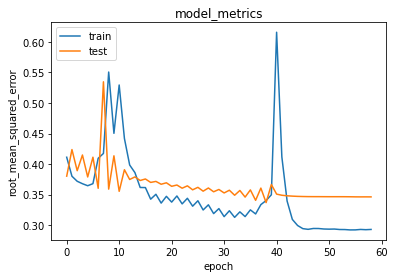

In [67]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("Model_metrics.jpg")
plt.show()

#### Mendapatkan Rekomendasi Buku

In [73]:
def book_recommendation_for_user(user_id,
                                 df=books_of_top_100_author,
                                 rating_df=book_rating,
                                 model=model,
                                 k=10):
    
    """
        Parameter:
        ---
        user_id: tipe data integer (Int64)
                 ID pengguna yang akan diberikan rekomendasi buku
        df: tipe data pd.DataFrame (object)
            data buku keseluruhan
        rating_df: tipe data pd.DataFrame (object)
                   data rating dari user ke buku yang dibaca
        model: model yang digunakan untuk mendapatkan rekomendasi buku
        k: tipe data integer (Int64)
           Banyaknya rekomendasi yang diberikan    
    """
    read_books = book_rating[book_rating["User-ID"]==user_id]
    
    # Mendapatkan buku yang belum dibaca
    not_read_books = df[~(df["Book-Title"].isin(read_books))]["Book-Title"]
    not_read_books = list(
    set(not_read_books)
    .intersection(set(title_to_title_encoded.keys()))
    )
    
    # Mendapatkan judul buku yang di-encode
    not_read_books = [[title_to_title_encoded.get(x)] for x in not_read_books]
    
    user_encoder = user_to_user_encoded.get(user_id)
    user_book_array = np.hstack(
    ([[user_encoder]] * len(not_read_books), not_read_books)
    )
    
    ratings = model.predict(user_book_array, verbose=0).flatten()
    
    top_rating_indices = ratings.argsort()[-k:][::-1]
    recommended_book_ids = [
        title_encoded_to_title.get(not_read_books[x][0]) for x in top_rating_indices
    ]

    print(f'Showing recommendations for user: {user_id}')
    print('===' * 9)
    print('Books with high ratings from user')
    print('----' * 8)

    top_books_user = (
        read_books.sort_values(by='Book-Rating', ascending=False).head(5)['Book-Title'].values
    )

    books_df_rows = df[df['Book-Title'].isin(top_books_user)]

    for row in books_df_rows.itertuples():
        print(row[2], ':', row[3])

    print('\n')
    print('----' * 8)
    print('Top 10 Books Recommendations')
    print('----' * 8)

    recommended_books = df[df['Book-Title'].isin(recommended_book_ids)]

    for row in recommended_books.itertuples():
        print(row[2], ':', row[3])


In [74]:
book_recommendation_for_user(book_rating['User-ID'].sample(1, random_state=42).iloc[0])

Showing recommendations for user: 78973
Books with high ratings from user
--------------------------------
Watchers : Dean_R._Koontz
Mr. Murder : Dean_R._Koontz
The Babes in the Wood: A Chief Inspector Wexford Mystery : Ruth_Rendell
First Term at Malory Towers : Enid_Blyton
Upper Fourth at Malory Towers : Enid_Blyton


--------------------------------
Top 10 Books Recommendations
--------------------------------
The Stand (The Complete and Uncut Edition) : Stephen_King
The Diaries of Adam and Eve : Mark_Twain
The Fellowship of the Ring (The Lord of the Rings, Part 1) : J._R._R._Tolkien
The Lord of the Rings (Leatherette Collector's Edition) : J._R._R._Tolkien
El Hobbit : J._R._R._Tolkien
The Hobbit (Young Adult edition, Sis cover) : J._R._R._Tolkien
Der Kleine Hobbit : J._R._R._Tolkien
Alice's Adventures in Wonderland ; And, Through the Looking-Glass and What Alice Found There (The World's Classics) : Lewis_Carroll
Cascades - \Fahrenheit 451\" (Collins Cascades)" : Ray_Bradbury
The Tra

## Evaluation

#### Content-based Filtering

Pada sistem rekomendasi ini, metode yang digunakan untuk mendapatkan rekomendasi buku yang memiliki kesamaan adalah metode `cosine similarity`. Metode ini digunakan karena yang dijadikan acuan sebagai kemiripan antara data satu dengan lainnya adalah sudut dari kedua vektor tersebut. Meskipun jarak dari kedua titik tersebut cukup jauh, namun titik-titik tersebut masih bisa saja memiliki sudut yang kecil. Semakin kecil sudut kedua vektor tersebut, maka kesamaan antar data semakin tinggi.

Adapun rumus dari cosine similarity adalah sebagai berikut:

$Cosine  Similarity = \frac{{A \cdot B}}{{\|A\| \cdot \|B\|}}$

Keterangan:
- A dan B adalah vektor dari kedua data
- ∥A∥ dan ∥B∥ merepresentasikan jarak euclidean dari vektor A dan B masing-masing.

In [ ]:
recommended_book_df = get_recommend("Le Jeu du furet")
cosine_sim_list = []
for book in recommended_book_df["Book-Title"]:
    result = cosine_sim_df.loc["Le Jeu du furet", book]
    cosine_sim_list.append(result)

print(f"The cosine similarity average of recommended book is {np.mean(cosine_sim_list)}")

#### Collaborative Filtering

Pada sistem rekomendasi ini, metriks yang digunakan untuk menghitung error adalah Root Mean Squared Error (RMSE). Metriks ini merupakan hasil dari selisih nilai asli dengan nilai prediksi, error tersebut dikuadratkan, menghitung rata-ratanya, setelah itu dihitung akar kuadratnya. Metriks ini digunakan karena data yang digunakan sudah dilakukan normalisasi sehingga data ini tidak memiliki nilai outlier.

Adapun rumus dari RMSE adalah sebagai berikut:


${RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

Keterangan:
- n adalah banyaknya data.
- $y_i$ adalah nilai asli
- $\hat{y}_i$ adalah nilai prediksi 

In [84]:
print(f"Nilai minimum RMSE pada train dari model adalah {round(min(history.history['root_mean_squared_error']), 4)}")
print(f"Nilai minimum RMSE pada validasi dari model adalah {round(min(history.history['val_root_mean_squared_error']), 4)}")

Nilai minimum RMSE pada train dari model adalah 0.2923
Nilai minimum RMSE pada validasi dari model adalah 0.337
